# Set Up

Using Fastai...

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash
  

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

## Get a list of URLs

### Download into file

1) Scroll images in Google Image search.
2) Press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> in Windows to get small window with the javascript 'Console'.
3) Paste this command to get the urls:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### Create directory and upload urls to Google Drive

For each folder below proceed through creation of 'dest' varialble ...


In [0]:
import os

In [0]:
folder = 'beetle/'
file = 'urls_beetle.txt'

In [0]:
folder = 'lady_bug/'
file = 'urls_lady_bug.txt'

In [0]:
folder = 'aphid/'
file = 'urls_aphid.txt'

In [0]:
Repeat this for each folder above

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/gdrive


In [0]:
!pwd


/content


In [0]:
base_dir

'/content/gdrive/My Drive/fastai-v3/'

In [0]:
!dir


data  gdrive  models


In [0]:
os.chdir(base_dir)

In [0]:
!pwd

/content/gdrive/My Drive/fastai-v3


In [0]:
!mkdir bugs

In [0]:
!dir



data


In [0]:
base_dir


'/content/gdrive/My Drive/fastai-v3/'

In [0]:
path = base_dir + 'data/bugs/'

In [0]:
path = Path(path)

In [0]:
dest = path/folder

In [0]:
dest

PosixPath('/content/gdrive/My Drive/fastai-v3/data/bugs/beetle')

In [0]:
dest.mkdir(parents=True, exist_ok=True)

In [0]:
dest

PosixPath('/content/gdrive/My Drive/fastai-v3/data/bugs/aphid')

Manually uploaded into Google Drive folders from desktop files

## Download images

Download images for each folder assigned to each class...

In [0]:
classes = ['beetle','lady_bug','aphid']

In [0]:
folder = 'beetle/'
file = 'urls_beetle.txt'

In [0]:
folder = 'lady_bug/'
file = 'urls_lady_bug.txt'

In [0]:
folder = 'aphid/'
file = 'urls_aphid.txt'

Repeat this next section for each of the above folders...

In [0]:
path/folder

PosixPath('/content/gdrive/My Drive/fastai-v3/data/bugs/aphid')

In [0]:
dest = path/folder

In [0]:
dest

PosixPath('/content/gdrive/My Drive/fastai-v3/data/bugs/aphid')

In [0]:
file


'urls_aphid.txt'

In [0]:
download_images(path/folder/file, dest, max_pics=200)

Remove any images that can't be opened:

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

## View data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [0]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

NotReadableError: Could not start video source


In [0]:
# If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
# data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Some of our pictures...

In [0]:
data.classes

['aphid', 'beetle', 'lady_bug']

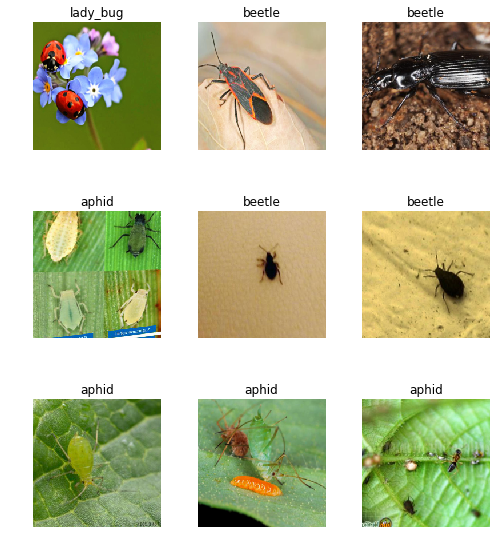

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['aphid', 'beetle', 'lady_bug'], 3, 226, 56)

## Train model

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.116457,1.204759,0.482143,00:07
1,1.320824,0.542151,0.142857,00:05
2,0.995393,0.493144,0.107143,00:05
3,0.834822,0.426018,0.089286,00:05


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (226 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
beetle,beetle,beetle,beetle,beetle
Path: /content/gdrive/My Drive/fastai-v3/data/bugs;

Valid: LabelList (56 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
beetle,beetle,lady_bug,lady_bug,aphid
Path: /content/gdrive/My Drive/fastai-v3/data/bugs;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
 

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


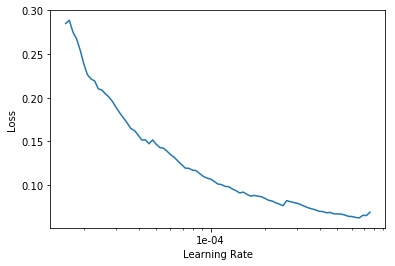

In [0]:
# If the plot is not showing try to give a start and end learning rate
#learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.lr_find(start_lr=1e-5, end_lr=1e-3)
learn.recorder.plot()

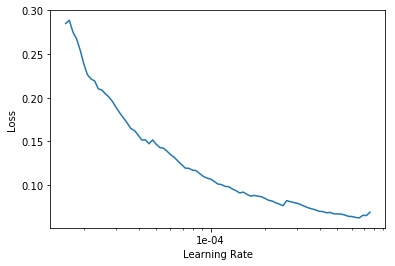

In [0]:
learn.recorder.plot()

In [0]:
#learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))
#learn.fit_one_cycle(2, max_lr=slice(3e-5,1e-3))
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.254449,0.421584,0.089286,00:05
1,0.264860,0.434185,0.089286,00:05


In [0]:
learn.save('stage-2')

In [0]:
learn.save('stage-3')

## Interpretation

In [0]:
learn.load('stage-3');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

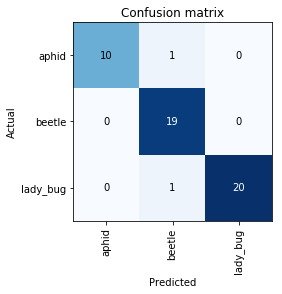

In [0]:
interp.plot_confusion_matrix()

In [0]:
interp.most_confused(min_val=1)

[('aphid', 'lady_bug', 3), ('beetle', 'lady_bug', 1), ('lady_bug', 'aphid', 1)]

## Create pkl file of model for production

In [0]:
learn.export()

When this was performed...

In [0]:
!date

Fri Oct 11 18:59:29 UTC 2019


Test inference on CPU...

In [0]:
defaults.device = torch.device('cpu')

In [0]:
path

PosixPath('/content/gdrive/My Drive/fastai-v3/data/bugs')

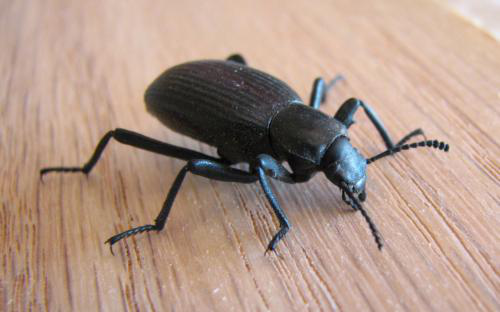

In [0]:
img = open_image(path/'beetle'/'00000092.jpg')
img

We create our `Learner` in production enviromnent like this, just make sure that `path` contains the file 'export.pkl' from before.

In [0]:
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category beetle

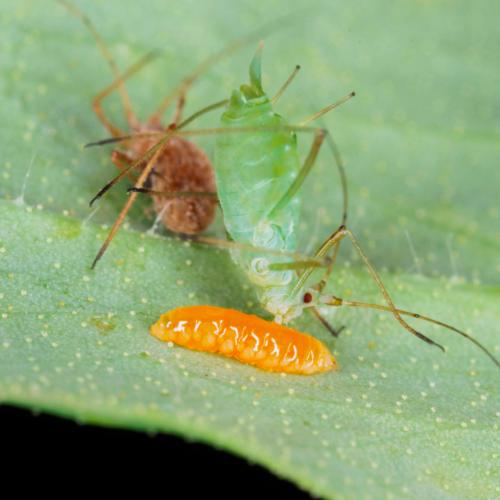

In [0]:
img = open_image(path/'aphid'/'00000090.jpg')
img

In [0]:
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category aphid

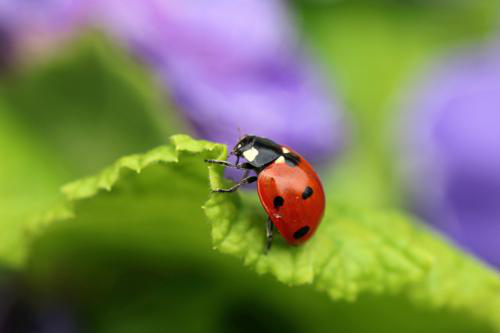

In [0]:
img = open_image(path/'lady_bug'/'00000087.jpg')
img

In [0]:
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category lady_bug

#WORKING!!!

Starlette code:
this route creation example by Simon Willison: (https://github.com/simonw/cougar-or-not) 

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit.)